#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model1 = Sequential()
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()
model5 = Sequential()
model6 = Sequential()


In [0]:
#卷積層1

In [9]:
model1.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model1.add(Dropout(rate=0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(rate=0.25))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model1.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_

In [10]:
model2.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model2.add(Dropout(rate=0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(rate=0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [11]:
model3.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model3.add(Dropout(rate=0.25))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model3.add(Dropout(0.25))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(rate=0.25))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(rate=0.25))
model3.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [0]:
model4 = Sequential()

In [13]:
model4.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model4.add(Dropout(rate=0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dropout(rate=0.25))
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(rate=0.25))
model4.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [14]:
model5 = Sequential()
model5.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model5.add(Dropout(rate=0.25))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model5.add(Dropout(0.25))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dropout(rate=0.25))
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(rate=0.25))
model5.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model5.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [15]:
model6 = Sequential()
model6.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model6.add(Dropout(rate=0.25))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model6.add(Dropout(0.25))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Flatten())
model6.add(Dropout(rate=0.25))
model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(rate=0.25))
model6.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model6.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [16]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 10s 269us/step - loss: 1.5371 - acc: 0.4468 - val_loss: 1.3406 - val_acc: 0.5699
Epoch 2/11
37500/37500 [==============================] - 8s 210us/step - loss: 1.1558 - acc: 0.5861 - val_loss: 1.1302 - val_acc: 0.6235
Epoch 3/11
37500/37500 [==============================] - 8s 211us/step - loss: 1.0210 - acc: 0.6395 - val_loss: 1.0227 - val_acc: 0.6799
Epoch 4/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.9138 - acc: 0.6781 - val_loss: 0.9787 - val_acc: 0.6844
Epoch 5/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.8202 - acc: 0.7110 - val_loss: 0.9105 - val_acc: 0.7045
Epoch 6/11
37500/37500 [==============================] - 8s 216us/step - loss: 0.7379 - acc: 0.7407 - val_loss: 0.8707 - val_acc: 0.7087
Epoch 7/11
37500/37500 [=

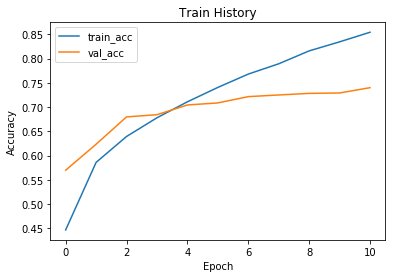

In [17]:
#loss_func='categorical_crossentropy'
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history1=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1)  

import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history1.history[train_acc])
    plt.plot(train_history1.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')

In [18]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 7s 194us/step - loss: 0.0909 - acc: 0.1001 - val_loss: 0.0899 - val_acc: 0.1251
Epoch 2/11
37500/37500 [==============================] - 7s 179us/step - loss: 0.0904 - acc: 0.1087 - val_loss: 0.0897 - val_acc: 0.1401
Epoch 3/11
37500/37500 [==============================] - 7s 182us/step - loss: 0.0900 - acc: 0.1186 - val_loss: 0.0896 - val_acc: 0.1521
Epoch 4/11
37500/37500 [==============================] - 7s 181us/step - loss: 0.0899 - acc: 0.1232 - val_loss: 0.0895 - val_acc: 0.1632
Epoch 5/11
37500/37500 [==============================] - 7s 179us/step - loss: 0.0897 - acc: 0.1277 - val_loss: 0.0894 - val_acc: 0.1705
Epoch 6/11
37500/37500 [==============================] - 7s 178us/step - loss: 0.0895 - acc: 0.1361 - val_loss: 0.0893 - val_acc: 0.1837
Epoch 7/11
37500/37500 [==============================] - 7s 178us/step - loss: 0.0893 - acc: 0.1430 - val_loss: 0.0892 - 

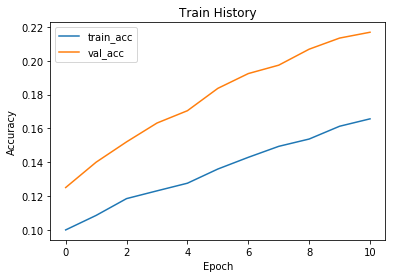

In [19]:
#loss_func='mean_squared_error'
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history2=model2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1) 
def show_train_history(train_acc,test_acc):
    plt.plot(train_history2.history[train_acc])
    plt.plot(train_history2.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 9s 227us/step - loss: 0.0715 - acc: 0.4115 - val_loss: 0.0653 - val_acc: 0.5114
Epoch 2/11
37500/37500 [==============================] - 8s 206us/step - loss: 0.0572 - acc: 0.5618 - val_loss: 0.0565 - val_acc: 0.6065
Epoch 3/11
37500/37500 [==============================] - 8s 210us/step - loss: 0.0508 - acc: 0.6173 - val_loss: 0.0505 - val_acc: 0.6508
Epoch 4/11
37500/37500 [==============================] - 8s 208us/step - loss: 0.0467 - acc: 0.6553 - val_loss: 0.0484 - val_acc: 0.6607
Epoch 5/11
37500/37500 [==============================] - 8s 212us/step - loss: 0.0425 - acc: 0.6902 - val_loss: 0.0454 - val_acc: 0.6789
Epoch 6/11
37500/37500 [==============================] - 8s 209us/step - loss: 0.0387 - acc: 0.7199 - val_loss: 0.0441 - val_acc: 0.6817
Epoch 7/11
37500/37500 [==============================] - 8s 210us/step - loss: 0.0355 - acc: 0.7466 - val_loss: 0.0417 - 

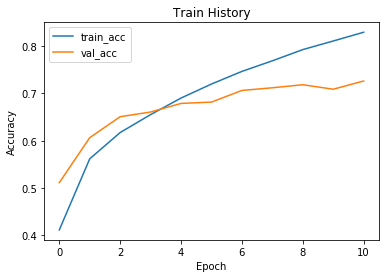

In [20]:
#loss_func='mean_squared_error'
model5.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

train_history5=model5.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1)
def show_train_history(train_acc,test_acc):
    plt.plot(train_history5.history[train_acc])
    plt.plot(train_history5.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 7s 198us/step - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3227 - val_acc: 0.9000
Epoch 2/11
37500/37500 [==============================] - 7s 180us/step - loss: 0.3215 - acc: 0.9000 - val_loss: 0.3207 - val_acc: 0.9000
Epoch 3/11
37500/37500 [==============================] - 7s 180us/step - loss: 0.3183 - acc: 0.9000 - val_loss: 0.3181 - val_acc: 0.9000
Epoch 4/11
37500/37500 [==============================] - 7s 179us/step - loss: 0.3139 - acc: 0.9000 - val_loss: 0.3143 - val_acc: 0.9000
Epoch 5/11
37500/37500 [==============================] - 7s 181us/step - loss: 0.3083 - acc: 0.9000 - val_loss: 0.3096 - val_acc: 0.9000
Epoch 6/11
37500/37500 [==============================] - 7s 181us/step - loss: 0.3025 - acc: 0.9000 - val_loss: 0.3044 - val_acc: 0.9000
Epoch 7/11
37500/37500 [==============================] - 7s 181us/step - loss: 0.2973 - acc: 0.9002 - val_loss: 0.3004 - 

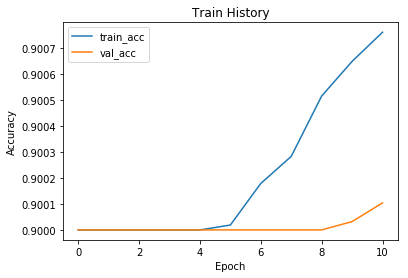

In [21]:
#loss_func='binary _crossentropy'
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history3=model3.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1) 
def show_train_history(train_acc,test_acc):
    plt.plot(train_history3.history[train_acc])
    plt.plot(train_history3.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 9s 233us/step - loss: 0.2317 - acc: 0.9124 - val_loss: 0.2167 - val_acc: 0.9148
Epoch 2/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.1817 - acc: 0.9284 - val_loss: 0.1829 - val_acc: 0.9275
Epoch 3/11
37500/37500 [==============================] - 8s 214us/step - loss: 0.1608 - acc: 0.9366 - val_loss: 0.1645 - val_acc: 0.9359
Epoch 4/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.1449 - acc: 0.9434 - val_loss: 0.1530 - val_acc: 0.9406
Epoch 5/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.1316 - acc: 0.9484 - val_loss: 0.1421 - val_acc: 0.9445
Epoch 6/11
37500/37500 [==============================] - 8s 209us/step - loss: 0.1206 - acc: 0.9524 - val_loss: 0.1386 - val_acc: 0.9469
Epoch 7/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.1102 - acc: 0.9568 - val_loss: 0.1346 - 

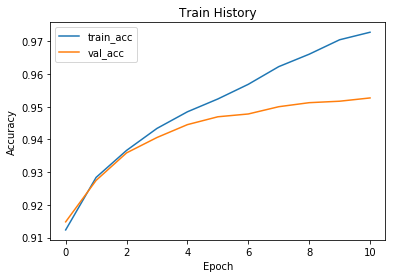

In [22]:
#loss_func='binary _crossentropy'
model4.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_history4=model4.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1)     
def show_train_history(train_acc,test_acc):
    plt.plot(train_history4.history[train_acc])
    plt.plot(train_history4.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/11
37500/37500 [==============================] - 9s 237us/step - loss: 0.3745 - acc: 0.8695 - val_loss: 0.7715 - val_acc: 0.7373
Epoch 2/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.3200 - acc: 0.8881 - val_loss: 0.7602 - val_acc: 0.7433
Epoch 3/11
37500/37500 [==============================] - 8s 208us/step - loss: 0.2896 - acc: 0.8997 - val_loss: 0.7690 - val_acc: 0.7430
Epoch 4/11
37500/37500 [==============================] - 8s 209us/step - loss: 0.2574 - acc: 0.9110 - val_loss: 0.7819 - val_acc: 0.7424
Epoch 5/11
37500/37500 [==============================] - 8s 210us/step - loss: 0.2341 - acc: 0.9200 - val_loss: 0.7815 - val_acc: 0.7406
Epoch 6/11
37500/37500 [==============================] - 8s 210us/step - loss: 0.2179 - acc: 0.9246 - val_loss: 0.8236 - val_acc: 0.7338
Epoch 7/11
37500/37500 [==============================] - 8s 211us/step - loss: 0.2008 - acc: 0.9298 - val_loss: 0.8028 - 

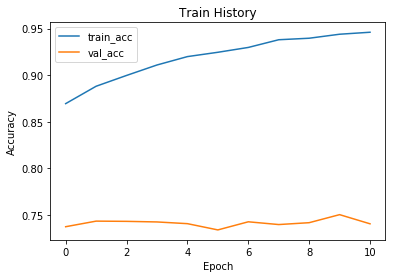

In [23]:
#loss_func='categorical_crossentropy'
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history1=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=11, batch_size=128, verbose=1)  
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history1.history[train_acc])
    plt.plot(train_history1.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')

In [0]:
多分類問題,loss function適用categorical_crossentropy
二元分類問題,loss function適用binary_crossentropy
回歸問題,loss function適用mean_squared_error


In [0]:
在此題DataSet:cifar10應屬多分類問題,
我在train多個不同的loss func&optimizer,若找開始overfit的acc結果如下,
請教為acc最高的是binary_crossentropy,卻不是categorical_crossentropy？？
'''
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) acc約: 0.6781
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) X
model5.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy']) acc約: 0.6173
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) acc約: 0.9000
model4.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) val_acc約: 0.9275
'''